# COLOR INVERSION TRANSFORMATION
## Colab set-up


In [ ]:
# Mount Google Drive
from google.colab import drive 

ROOT = "/content/drive"   
print(ROOT)                 

drive.mount(ROOT)           

import os
folder_path = --- # FILL
os.chdir(folder_path)

## Imports


In [ ]:
# Import of the custom modules
import imp 
models_pytorch = imp.new_module('models_pytorch')
exec(open("./models_pytorch.py").read(), models_pytorch.__dict__)

In [ ]:
import copy
import numpy as np
import torch
import matplotlib.pyplot as plt

from models_pytorch import ExtendedMultiLR, ExtendedMLP, ExtendedLenet5
from os.path import join  
from torch import nn
from torch import optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

In [ ]:
def eval_model_performance(model, trainloader, validloader, testloader):

    train_performance = model.eval_performance(trainloader)
    validation_performance = model.eval_performance(validloader)
    test_performance = model.eval_performance(testloader)

    print("Train Accuracy %.3f" % (round(train_performance.item(), 3)))
    print("Validation Accuracy %.3f" %(round(validation_performance.item(), 3)))
    print("Test Accuracy %.3f" %(round(test_performance.item(), 3)))

    plt.plot(model.loss_during_training, '-b', 
            label='Training Cross Entropy Loss')
    plt.plot(model.valid_loss_during_training, '-r', 
            label='Validation Cross Entropy Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()

## Original MNIST evaluation


In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training  data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, 
                          transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, 
                         transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Splitting training dataset into train and validation
last_train_index = int(len(trainloader.dataset.data) * 0.8)

validloader = copy.deepcopy(trainloader)  # Creates a copy of the object 

trainloader.dataset.data = trainloader.dataset.data[:last_train_index,:,:]
trainloader.dataset.targets = trainloader.dataset.targets[:last_train_index]

validloader.dataset.data = validloader.dataset.data[last_train_index:,:,:]
validloader.dataset.targets = validloader.dataset.targets[last_train_index:]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


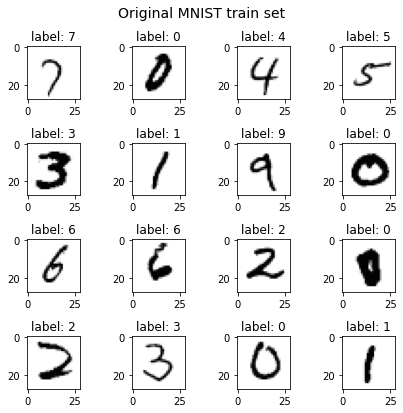

In [ ]:
# Create iterable of train loader and load a chunk
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Plots several example in a grid nrows*ncols
nrows = 4
ncols = 4
num_samples_drawn = int(nrows * ncols)

fig, ax = plt.subplots(nrows, ncols, figsize=(6, 6))

i = 0
for row in range(nrows):
    for col in range(ncols):
        img = images[i].numpy().reshape([28,28])  
        ax[row][col].imshow(img, cmap="Greys")
        fig.show()
        ax[row][col].set_title("label: {}".format(labels[i]))
        i += 1
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # fix for suptitle 
plt.suptitle("Original MNIST train set", fontsize=14)
plt.show()

### Multi LR

In [ ]:
clean_multi_lr = ExtendedMultiLR(dimx=784, nlabels=10, epochs=10, lr=1e-3)
print(clean_multi_lr)

ExtendedMultiLR(
  (output): Linear(in_features=784, out_features=10, bias=True)
  (logsoftmax): LogSoftmax()
  (criterion): NLLLoss()
)


In [ ]:
clean_multi_lr.trainloop(trainloader,validloader)

Epoch 0. Training loss: 0.493716, Validation loss: 0.332967, Time per epoch: 12.191923 seconds
Epoch 1. Training loss: 0.334840, Validation loss: 0.302949, Time per epoch: 12.461849 seconds
Epoch 2. Training loss: 0.316788, Validation loss: 0.311277, Time per epoch: 11.945605 seconds
Epoch 3. Training loss: 0.309200, Validation loss: 0.285174, Time per epoch: 11.912975 seconds
Epoch 4. Training loss: 0.301013, Validation loss: 0.283251, Time per epoch: 11.561815 seconds
Epoch 5. Training loss: 0.295289, Validation loss: 0.285010, Time per epoch: 12.125016 seconds
Epoch 6. Training loss: 0.294726, Validation loss: 0.285633, Time per epoch: 11.891855 seconds
Epoch 7. Training loss: 0.287484, Validation loss: 0.290459, Time per epoch: 11.677632 seconds
Epoch 8. Training loss: 0.285409, Validation loss: 0.278310, Time per epoch: 11.845880 seconds
Epoch 9. Training loss: 0.284188, Validation loss: 0.298850, Time per epoch: 11.789668 seconds


Train Accuracy 0.916937
Validation Accuracy 0.914312
Test Accuracy 0.915506


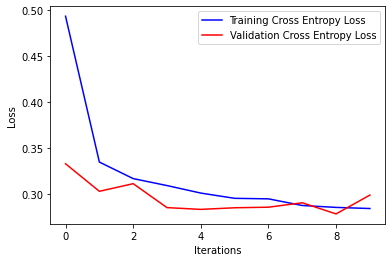

In [ ]:
eval_model_performance(clean_multi_lr, trainloader, validloader, testloader)

 ### MLP


In [ ]:
clean_mlp = ExtendedMLP(dimx=784, hidden1=256, hidden2=128, hidden3=64,
                        nlabels=10, epochs=30, lr=1e-3)
print(clean_mlp)

ExtendedMLP(
  (output1): Linear(in_features=784, out_features=256, bias=True)
  (output2): Linear(in_features=256, out_features=128, bias=True)
  (output3): Linear(in_features=128, out_features=64, bias=True)
  (output4): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (logsoftmax): LogSoftmax()
  (dropout): Dropout(p=0.2, inplace=False)
  (criterion): NLLLoss()
)


In [ ]:
clean_mlp.trainloop(trainloader, validloader)

Epoch 0. Training loss: 0.520144, Validation loss: 0.258292, Time per epoch: 13.644447 seconds
Epoch 1. Training loss: 0.250766, Validation loss: 0.146250, Time per epoch: 13.647844 seconds
Epoch 2. Training loss: 0.205711, Validation loss: 0.127898, Time per epoch: 13.220595 seconds
Epoch 3. Training loss: 0.180186, Validation loss: 0.124660, Time per epoch: 13.569154 seconds
Epoch 4. Training loss: 0.155448, Validation loss: 0.121818, Time per epoch: 13.919480 seconds
Epoch 5. Training loss: 0.146277, Validation loss: 0.111396, Time per epoch: 13.319832 seconds
Epoch 6. Training loss: 0.134228, Validation loss: 0.104530, Time per epoch: 14.087702 seconds
Epoch 7. Training loss: 0.124425, Validation loss: 0.097120, Time per epoch: 13.052141 seconds
Epoch 8. Training loss: 0.116050, Validation loss: 0.104156, Time per epoch: 13.951743 seconds
Epoch 9. Training loss: 0.113223, Validation loss: 0.103609, Time per epoch: 13.666603 seconds
Epoch 10. Training loss: 0.103889, Validation loss

Train Accuracy 0.994146
Validation Accuracy 0.978890
Test Accuracy 0.978901


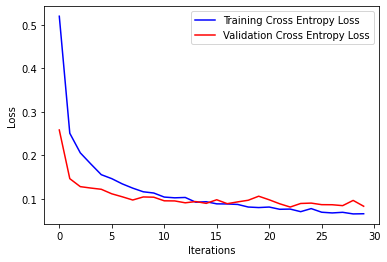

In [ ]:
eval_model_performance(clean_mlp, trainloader, validloader, testloader)

### Lenet5


In [ ]:
clean_lenet5 = ExtendedLenet5(dimx=28, nlabels=10, epochs=10, use_batch_norm=True)
print(clean_lenet5)

ExtendedLenet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (output1): Linear(in_features=256, out_features=120, bias=True)
  (output2): Linear(in_features=120, out_features=84, bias=True)
  (output3): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
  (logsoftmax): LogSoftmax()
  (dropout): Dropout(p=0.4, inplace=False)
  (batch_norm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (criterion): NLLLoss()
)


In [ ]:
clean_lenet5.trainloop(trainloader,validloader)

Epoch 0. Training loss: 0.358584, Validation loss: 0.073618, Time per epoch: 15.360969 seconds
Epoch 1. Training loss: 0.112226, Validation loss: 0.054695, Time per epoch: 15.558482 seconds
Epoch 2. Training loss: 0.087102, Validation loss: 0.054843, Time per epoch: 15.600821 seconds
Epoch 3. Training loss: 0.073142, Validation loss: 0.045445, Time per epoch: 15.297146 seconds
Epoch 4. Training loss: 0.065182, Validation loss: 0.042147, Time per epoch: 14.809301 seconds
Epoch 5. Training loss: 0.061437, Validation loss: 0.042355, Time per epoch: 15.275895 seconds
Epoch 6. Training loss: 0.053820, Validation loss: 0.040725, Time per epoch: 15.791808 seconds
Epoch 7. Training loss: 0.049961, Validation loss: 0.041437, Time per epoch: 15.231679 seconds
Epoch 8. Training loss: 0.046635, Validation loss: 0.046218, Time per epoch: 15.016274 seconds
Epoch 9. Training loss: 0.042506, Validation loss: 0.043177, Time per epoch: 15.456232 seconds


Train Accuracy 0.994833
Validation Accuracy 0.987201
Test Accuracy 0.989451


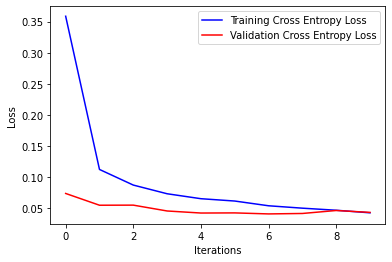

In [ ]:
eval_model_performance(clean_lenet5, trainloader, validloader, testloader)

## Transformed MNIST evaluation
Half of the instances have been transformed by inverting their colors.




In [ ]:
class CustomDataset(Dataset):
    """Pytorch dataset extension.

    This module allows to transform a set of data and targets numpy variables 
    into a pytorch dataset.
    """
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.LongTensor(targets)
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]

        if self.transform:
            x = Image.fromarray(self.data[index].astype(np.uint8))
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)

TRANSFORMED_DATA_PATH = join(GIT_REPOSITORY_PATH, 
                             "exp1/output_data_transformer/")

# Loading the data
x_train = np.load(join(TRANSFORMED_DATA_PATH, "mnist_x_train_tr_neg.npy"))
y_train = np.load(join(TRANSFORMED_DATA_PATH, "mnist_y_train_tr.npy"))

x_test = np.load(join(TRANSFORMED_DATA_PATH, "mnist_x_test_tr_neg.npy"))
y_test = np.load(join(TRANSFORMED_DATA_PATH, "mnist_y_test_tr.npy"))

# Need to be reshaped
#x_train = x_train.reshape(60000, 1, 28, 28)
#x_test = x_test.reshape(10000, 1, 28, 28)

# Transform into pytorch datasets
trainset = CustomDataset(x_train, y_train, transform=transform)
testset = CustomDataset(x_test, y_test, transform=transform)

# Transform into pytorch loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Splitting training dataset into train and validation
last_train_index = int(len(trainloader.dataset.data) * 0.8)

validloader = copy.deepcopy(trainloader)  # Creates a copy of the object 

trainloader.dataset.data = trainloader.dataset.data[:last_train_index,:,:]
trainloader.dataset.targets = trainloader.dataset.targets[:last_train_index]

validloader.dataset.data = validloader.dataset.data[last_train_index:,:,:]
validloader.dataset.targets = validloader.dataset.targets[last_train_index:]

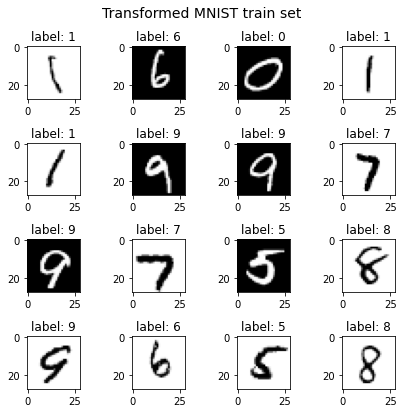

In [ ]:
# Create iterable of train loader and load a chunk
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Plots several example in a grid nrows*ncols
nrows = 4
ncols = 4
num_samples_drawn = int(nrows * ncols)

fig, ax = plt.subplots(nrows, ncols, figsize=(6, 6))

i = 0
for row in range(nrows):
    for col in range(ncols):
        img = images[i].numpy().reshape([28,28])  
        ax[row][col].imshow(img, cmap="Greys")
        fig.show()
        ax[row][col].set_title("label: {}".format(labels[i]))
        i += 1
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # fix for suptitle 
plt.suptitle("Transformed MNIST train set", fontsize=14)
plt.show()

### Testing performance of clean models
#### Multi LR

Train Accuracy 0.458
Validation Accuracy 0.462
Test Accuracy 0.458


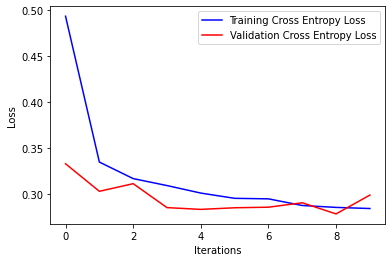

In [ ]:
eval_model_performance(clean_multi_lr, trainloader, validloader, testloader)

#### MLP 

Train Accuracy 0.500
Validation Accuracy 0.502
Test Accuracy 0.495


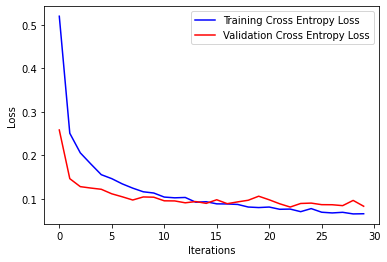

In [ ]:
eval_model_performance(clean_mlp, trainloader, validloader, testloader)

#### Lenet-5

Train Accuracy 0.621
Validation Accuracy 0.621
Test Accuracy 0.623


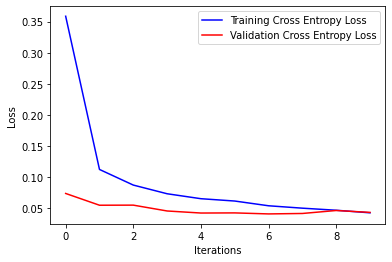

In [ ]:
eval_model_performance(clean_lenet5, trainloader, validloader, testloader)

### Multi LR

In [ ]:
transf_multi_lr = ExtendedMultiLR(dimx=784, nlabels=10, epochs=10, lr=1e-3)
print(transf_multi_lr)

ExtendedMultiLR(
  (output): Linear(in_features=784, out_features=10, bias=True)
  (logsoftmax): LogSoftmax()
  (criterion): NLLLoss()
)


In [ ]:
transf_multi_lr.trainloop(trainloader,validloader)

Epoch 0. Training loss: 2.368417, Validation loss: 2.356104, Time per epoch: 12.096621 seconds
Epoch 1. Training loss: 2.352684, Validation loss: 2.331101, Time per epoch: 12.078592 seconds
Epoch 2. Training loss: 2.346419, Validation loss: 2.393407, Time per epoch: 12.447500 seconds
Epoch 3. Training loss: 2.344679, Validation loss: 2.345015, Time per epoch: 12.093190 seconds
Epoch 4. Training loss: 2.347625, Validation loss: 2.361054, Time per epoch: 12.479796 seconds
Epoch 5. Training loss: 2.340619, Validation loss: 2.381071, Time per epoch: 12.539522 seconds
Epoch 6. Training loss: 2.341665, Validation loss: 2.390844, Time per epoch: 12.483709 seconds
Epoch 7. Training loss: 2.342806, Validation loss: 2.397759, Time per epoch: 12.865108 seconds
Epoch 8. Training loss: 2.338321, Validation loss: 2.374573, Time per epoch: 12.112012 seconds
Epoch 9. Training loss: 2.339608, Validation loss: 2.364195, Time per epoch: 11.963189 seconds


Train Accuracy 0.228
Validation Accuracy 0.196
Test Accuracy 0.194


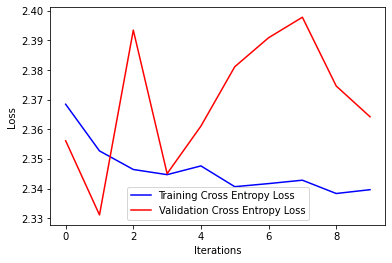

In [ ]:
eval_model_performance(transf_multi_lr, trainloader, validloader, testloader)

### MLP

In [ ]:
transf_mlp = ExtendedMLP(dimx=784, hidden1=256, hidden2=128, hidden3=64,
                         nlabels=10, epochs=30, lr=1e-3)
print(transf_mlp)

ExtendedMLP(
  (output1): Linear(in_features=784, out_features=256, bias=True)
  (output2): Linear(in_features=256, out_features=128, bias=True)
  (output3): Linear(in_features=128, out_features=64, bias=True)
  (output4): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (logsoftmax): LogSoftmax()
  (dropout): Dropout(p=0.2, inplace=False)
  (criterion): NLLLoss()
)


In [ ]:
transf_mlp.trainloop(trainloader, validloader)

Epoch 0. Training loss: 0.657428, Validation loss: 0.312802, Time per epoch: 13.777752 seconds
Epoch 1. Training loss: 0.316791, Validation loss: 0.218747, Time per epoch: 13.751419 seconds
Epoch 2. Training loss: 0.260841, Validation loss: 0.166883, Time per epoch: 13.802532 seconds
Epoch 3. Training loss: 0.227341, Validation loss: 0.174146, Time per epoch: 13.381968 seconds
Epoch 4. Training loss: 0.205003, Validation loss: 0.162815, Time per epoch: 13.436009 seconds
Epoch 5. Training loss: 0.191449, Validation loss: 0.164315, Time per epoch: 13.887084 seconds
Epoch 6. Training loss: 0.176529, Validation loss: 0.132848, Time per epoch: 13.445354 seconds
Epoch 7. Training loss: 0.170445, Validation loss: 0.121722, Time per epoch: 13.507926 seconds
Epoch 8. Training loss: 0.157752, Validation loss: 0.129702, Time per epoch: 13.616931 seconds
Epoch 9. Training loss: 0.151200, Validation loss: 0.133294, Time per epoch: 13.697647 seconds
Epoch 10. Training loss: 0.144383, Validation loss

Train Accuracy 0.990
Validation Accuracy 0.973
Test Accuracy 0.973


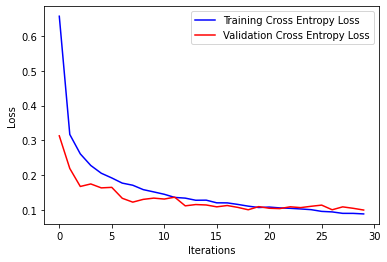

In [ ]:
eval_model_performance(transf_mlp, trainloader, validloader, testloader)

### Lenet5

In [ ]:
transf_lenet5 = ExtendedLenet5(dimx=28, nlabels=10, epochs=10, 
                               use_batch_norm=True)
print(transf_lenet5)

ExtendedLenet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (output1): Linear(in_features=256, out_features=120, bias=True)
  (output2): Linear(in_features=120, out_features=84, bias=True)
  (output3): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
  (logsoftmax): LogSoftmax()
  (dropout): Dropout(p=0.4, inplace=False)
  (batch_norm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (criterion): NLLLoss()
)


In [ ]:
transf_lenet5.trainloop(trainloader, validloader)

Epoch 0. Training loss: 0.444972, Validation loss: 0.112753, Time per epoch: 15.223895 seconds
Epoch 1. Training loss: 0.133261, Validation loss: 0.078198, Time per epoch: 15.038933 seconds
Epoch 2. Training loss: 0.105516, Validation loss: 0.065409, Time per epoch: 15.505094 seconds
Epoch 3. Training loss: 0.090369, Validation loss: 0.066835, Time per epoch: 15.466779 seconds
Epoch 4. Training loss: 0.078467, Validation loss: 0.056541, Time per epoch: 14.979987 seconds
Epoch 5. Training loss: 0.075648, Validation loss: 0.055225, Time per epoch: 15.960648 seconds
Epoch 6. Training loss: 0.067951, Validation loss: 0.059047, Time per epoch: 15.460771 seconds
Epoch 7. Training loss: 0.062588, Validation loss: 0.060388, Time per epoch: 15.346006 seconds
Epoch 8. Training loss: 0.058388, Validation loss: 0.062100, Time per epoch: 15.324109 seconds
Epoch 9. Training loss: 0.056260, Validation loss: 0.052499, Time per epoch: 15.440027 seconds


Train Accuracy 0.993
Validation Accuracy 0.987
Test Accuracy 0.989


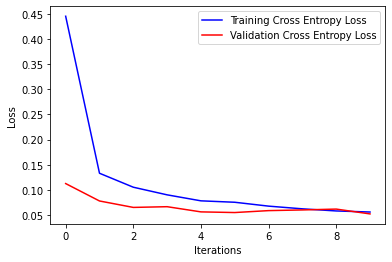

In [ ]:
eval_model_performance(transf_lenet5, trainloader, validloader, testloader)

## Aligned MNIST evaluation
The images which were transformed by a color inversion have been domain aligned back to their original domain with CycleGAN.



In [ ]:
ALIGNED_DATA_PATH = join(GIT_REPOSITORY_PATH, 
                             "exp1/output_gan_image_loader/")

# Loading the data
x_train = np.load(join(ALIGNED_DATA_PATH, "mnist_x_train_aligned.npy"))
y_train = np.load(join(ALIGNED_DATA_PATH, "mnist_y_train_aligned.npy"))

x_test = np.load(join(ALIGNED_DATA_PATH, "mnist_x_test_aligned.npy"))
y_test = np.load(join(ALIGNED_DATA_PATH, "mnist_y_test_aligned.npy"))

# Need to be reshaped
# x_train = x_train.reshape(60000, 1, 28, 28)
# x_test = x_test.reshape(10000, 1, 28, 28)

# Transform into pytorch datasets
trainset = CustomDataset(x_train, y_train, transform=transform)
testset = CustomDataset(x_test, y_test, transform=transform)

# Transform into pytorch loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Splitting training dataset into train and validation
last_train_index = int(len(trainloader.dataset.data) * 0.8)

validloader = copy.deepcopy(trainloader)  # Creates a copy of the object 

trainloader.dataset.data = trainloader.dataset.data[:last_train_index,:,:]
trainloader.dataset.targets = trainloader.dataset.targets[:last_train_index]

validloader.dataset.data = validloader.dataset.data[last_train_index:,:,:]
validloader.dataset.targets = validloader.dataset.targets[last_train_index:]

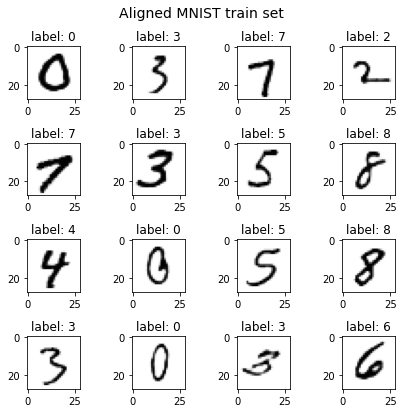

In [ ]:
# Create iterable of train loader and load a chunk
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Plots several example in a grid nrows*ncols
nrows = 4
ncols = 4
num_samples_drawn = int(nrows * ncols)

fig, ax = plt.subplots(nrows, ncols, figsize=(6, 6))

i = 0
for row in range(nrows):
    for col in range(ncols):
        img = images[i].numpy().reshape([28,28])  
        ax[row][col].imshow(img, cmap="Greys")
        fig.show()
        ax[row][col].set_title("label: {}".format(labels[i]))
        i += 1
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # fix for suptitle 
plt.suptitle("Aligned MNIST train set", fontsize=14)
plt.show()

### Testing performance of clean models
#### Multi LR

Train Accuracy 0.914
Validation Accuracy 0.916
Test Accuracy 0.914


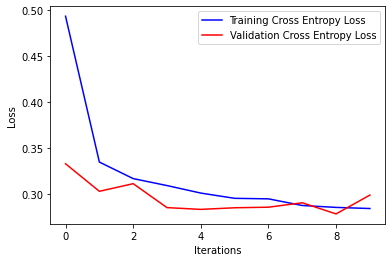

In [ ]:
eval_model_performance(clean_multi_lr, trainloader, validloader, testloader)

#### MLP

Train Accuracy 0.989
Validation Accuracy 0.990
Test Accuracy 0.978


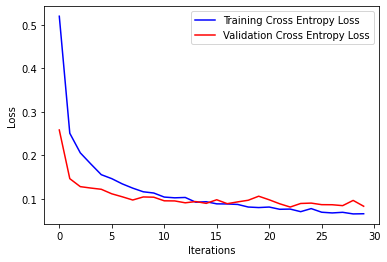

In [ ]:
eval_model_performance(clean_mlp, trainloader, validloader, testloader)

#### Lenet5

Train Accuracy 0.992
Validation Accuracy 0.991
Test Accuracy 0.989


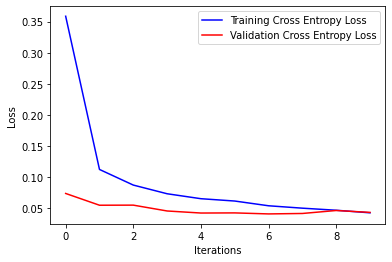

In [ ]:
eval_model_performance(clean_lenet5, trainloader, validloader, testloader)

### Multi LR

In [ ]:
aligned_multi_lr = ExtendedMultiLR(dimx=784, nlabels=10, epochs=10, lr=1e-3)
print(aligned_multi_lr)

ExtendedMultiLR(
  (output): Linear(in_features=784, out_features=10, bias=True)
  (logsoftmax): LogSoftmax()
  (criterion): NLLLoss()
)


In [ ]:
aligned_multi_lr.trainloop(trainloader,validloader)

Epoch 0. Training loss: 0.502344, Validation loss: 0.368036, Time per epoch: 12.156342 seconds
Epoch 1. Training loss: 0.338181, Validation loss: 0.333726, Time per epoch: 12.252131 seconds
Epoch 2. Training loss: 0.319052, Validation loss: 0.319812, Time per epoch: 12.387421 seconds
Epoch 3. Training loss: 0.308438, Validation loss: 0.311257, Time per epoch: 12.404530 seconds
Epoch 4. Training loss: 0.302018, Validation loss: 0.305772, Time per epoch: 12.672917 seconds
Epoch 5. Training loss: 0.296119, Validation loss: 0.310751, Time per epoch: 11.759533 seconds
Epoch 6. Training loss: 0.293194, Validation loss: 0.300124, Time per epoch: 12.782224 seconds
Epoch 7. Training loss: 0.289155, Validation loss: 0.309969, Time per epoch: 12.022542 seconds
Epoch 8. Training loss: 0.288806, Validation loss: 0.307659, Time per epoch: 11.991809 seconds
Epoch 9. Training loss: 0.286032, Validation loss: 0.297219, Time per epoch: 12.294491 seconds


Train Accuracy 0.925
Validation Accuracy 0.918
Test Accuracy 0.920


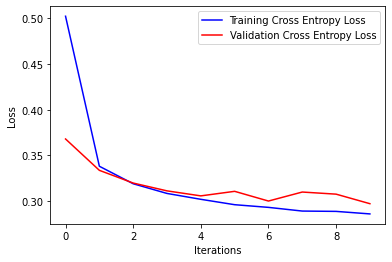

In [ ]:
eval_model_performance(aligned_multi_lr, trainloader, validloader, testloader)

### MLP

In [ ]:
aligned_mlp = ExtendedMLP(dimx=784, hidden1=256, hidden2=128, hidden3=64,
                          nlabels=10, epochs=30, lr=1e-3)
print(aligned_mlp)

ExtendedMLP(
  (output1): Linear(in_features=784, out_features=256, bias=True)
  (output2): Linear(in_features=256, out_features=128, bias=True)
  (output3): Linear(in_features=128, out_features=64, bias=True)
  (output4): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (logsoftmax): LogSoftmax()
  (dropout): Dropout(p=0.2, inplace=False)
  (criterion): NLLLoss()
)


In [ ]:
aligned_mlp.trainloop(trainloader, validloader)

Epoch 0. Training loss: 0.516876, Validation loss: 0.239779, Time per epoch: 14.097840 seconds
Epoch 1. Training loss: 0.249439, Validation loss: 0.171512, Time per epoch: 13.953886 seconds
Epoch 2. Training loss: 0.206078, Validation loss: 0.153810, Time per epoch: 13.904011 seconds
Epoch 3. Training loss: 0.177463, Validation loss: 0.121796, Time per epoch: 13.596238 seconds
Epoch 4. Training loss: 0.160636, Validation loss: 0.112987, Time per epoch: 13.904169 seconds
Epoch 5. Training loss: 0.147791, Validation loss: 0.122706, Time per epoch: 13.794744 seconds
Epoch 6. Training loss: 0.136546, Validation loss: 0.117226, Time per epoch: 13.448517 seconds
Epoch 7. Training loss: 0.131627, Validation loss: 0.115844, Time per epoch: 14.078387 seconds
Epoch 8. Training loss: 0.122225, Validation loss: 0.114416, Time per epoch: 13.880816 seconds
Epoch 9. Training loss: 0.114997, Validation loss: 0.104920, Time per epoch: 13.442297 seconds
Epoch 10. Training loss: 0.108353, Validation loss

Train Accuracy 0.992
Validation Accuracy 0.978
Test Accuracy 0.978


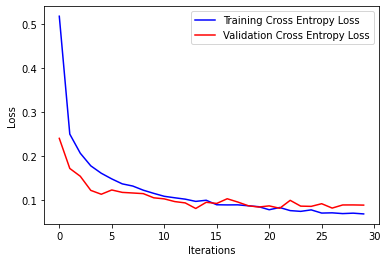

In [ ]:
eval_model_performance(aligned_mlp, trainloader, validloader, testloader)

### Lenet5

In [ ]:
aligned_lenet5 = ExtendedLenet5(dimx=28, nlabels=10, epochs=10, use_batch_norm=True)
print(aligned_lenet5)

ExtendedLenet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (output1): Linear(in_features=256, out_features=120, bias=True)
  (output2): Linear(in_features=120, out_features=84, bias=True)
  (output3): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
  (logsoftmax): LogSoftmax()
  (dropout): Dropout(p=0.4, inplace=False)
  (batch_norm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (criterion): NLLLoss()
)


In [ ]:
aligned_lenet5.trainloop(trainloader, validloader)

Epoch 0. Training loss: 0.372823, Validation loss: 0.088421, Time per epoch: 15.280676 seconds
Epoch 1. Training loss: 0.121046, Validation loss: 0.060719, Time per epoch: 15.100259 seconds
Epoch 2. Training loss: 0.096432, Validation loss: 0.058699, Time per epoch: 15.591478 seconds
Epoch 3. Training loss: 0.082537, Validation loss: 0.062954, Time per epoch: 15.394314 seconds
Epoch 4. Training loss: 0.074207, Validation loss: 0.053381, Time per epoch: 15.617682 seconds
Epoch 5. Training loss: 0.068002, Validation loss: 0.045452, Time per epoch: 15.487096 seconds
Epoch 6. Training loss: 0.061962, Validation loss: 0.045759, Time per epoch: 15.410698 seconds
Epoch 7. Training loss: 0.058638, Validation loss: 0.048052, Time per epoch: 15.438497 seconds
Epoch 8. Training loss: 0.052497, Validation loss: 0.044009, Time per epoch: 14.966196 seconds
Epoch 9. Training loss: 0.052075, Validation loss: 0.041617, Time per epoch: 15.808620 seconds


Train Accuracy 0.994
Validation Accuracy 0.988
Test Accuracy 0.989


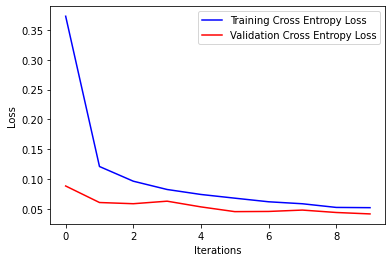

In [ ]:
eval_model_performance(aligned_lenet5, trainloader, validloader, testloader)